In [42]:
import networkx as nx
import pandas as pd
from fa2 import ForceAtlas2
from util import DATA_PATH
import ast
import matplotlib.pyplot as plt
import ast
from matplotlib.animation import FuncAnimation
import numpy as np
from datetime import datetime
import ast
import seaborn as sns

In [31]:
def node_degree_to_size(degree):
        return degree

In [11]:
# # df = pd.read_csv("data/attributes_album_artist_date_table.csv")
# # df_matches = pd.read_csv("data/updated_artist_matches.csv")
# # df["Artist references"] = df_matches["Artist references"].apply(ast.literal_eval)

# #1. Convert date to datetime format
# #df['Year'].dtype
# #df['Date'].dtype
# #df['Year']  = df['Year'].apply(str)
# #df['Date.1']df['Year'].dtype

# #convert month text to ordinal number
# # d_month = {'JANUARY': 1,
# #            'FEBRUARY': 2, 
# #            'MARCH': 3, 
# #            'APRIL':4,
# #            'MAY':5, 
# #            'JUNE':6, 
# #            'JULY':7,
# #            'AUGUST':8,
# #            'SEPTEMBER':9,
# #            'OCTOBER':10,
# #            'NOVEMBER':11,
# #            'DECEMBER':12}

# df['month updated']=[d_month.get(x) for x in df['Date']]
# df['month updated'] = df['month updated'].astype(float)
# df['month updated'] = df['month updated'].astype(int)
# df['month updated']=[d_month.get(x) for x in df['Date']]
# df['month updated'] = df['month updated'].astype(float)
# df['month updated']= df['month updated'].fillna(1)
# df['month updated'] = df['month updated'].astype(int)


# df['Date.1']= df['Date.1'].astype(str)
# df['Date.1'] = df['Date.1'].replace('?', 1)
# df["Date2"] = df['Year'].apply(str)+'-'+df['month updated'].apply(str)+'-'+df['Date.1'].apply(str)
# #convert to datetime format
# df["Release Date"] = [datetime.strptime(x, '%Y-%m-%d') for x in df["Date2"]]
# df.drop(["Date", "Date2", "Release_Data", "Release_Date"], axis=1)

# #sort by values
# df = df.sort_values(by=["Release Date"])

# #reorder columns
# #df = df.drop(["Unnamed: 0"], axis=1)
# df.columns =['Year', 'Month', 'Day', 'Album', 'Artist', 'Notes',
#        'Album link', 'Artist link', 'Artist Years Active', 'Artist Labels', 'Artist Genre',
#        'Collaborators', 'Album Release Date']
# #reorder columns
# cols = df.columns.tolist()
# cols = ['Year',
#  'Month',
#  'Day',
#  'Album Release Date',
#  'Album',
#  'Album link',
#  'Artist',
#  'Artist link',
#  'Artist Years Active',
#  'Artist Labels',
#  'Artist Genre',
#  'Collaborators',
#  ]
# df = df[cols]  
# #reorder columns
# #df = df.drop(['Notes'], axis=1)
# df.columns = ['Year',
#  'Month',
#  'Day',
#  'Album Release Date',
#  'Album',
#  'Album link',
#  'Artist',
#  'Artist link',
#  'Artist Years Active',
#  'Artist Labels',
#  'Artist Genre',
#  'Album Collaborators',
#  ]

# cols = df.columns.tolist()
# cols = ['Album',
#  'Year',
#  'Month',
#  'Day',
#  'Album Release Date',
#  'Album link',
#  'Artist',
#  'Artist link',
#  'Artist Years Active',
#  'Artist Labels',
#  'Artist Genre',
#  'Album Collaborators']
# df = df[cols]  
# df.columns = ['Album',
#  'Album Year',
#  'Album Month',
#  'Album Day',
#  'Album Release Date',
#  'Album link',
#  'Artist',
#  'Artist link',
#  'Artist Years Active',
#  'Artist Labels',
#  'Artist Genre',
#  'Album Collaborators']

# #add new column
# df["Number of Collaborators"]=df['Album Collaborators'].apply(lambda x: len(x))

#df["Album Collaborators"] = df["Album Collaborators"].apply(ast.literal_eval)

In [12]:
df = pd.read_csv("data/album_artist_collabs.csv")
df["Album Collaborators"] = df["Album Collaborators"].apply(ast.literal_eval)
df.head(5)

,Unnamed: 0,Unnamed: 0.1,Album,Album Year,Album Month,Album Day,Album Release Date,Album link,Artist,Artist link,Artist Years Active,Artist Labels,Artist Genre,Album Collaborators,Number of Collaborators
0,0,13,The Best of Van Morrison,1990,JANUARY,1,1990-01-01,The_Best_of_Van_Morrison,Van Morrison,Van_Morrison,1958–present,Decca Bang Warner Bros. London Mercury Exile P...,Rock R&B folk blues soul Celtic jazz soft rock...,"[Robbie Robertson, Van Morrison]",2
1,1,14,Colour,1990,JANUARY,1,1990-01-01,Colour_(The_Christians_album),The Christians,The_Christians_(band),0,0,0,[],0
2,2,0,Scumdogs of the Universe,1990,JANUARY,8,1990-01-08,Scumdogs_of_the_Universe,GWAR,GWAR,1984–present,Shimmy Disc Master Metal Blade DRT Entertainment,Thrash metal hardcore punk crossover thrash he...,[N.W.A],1
3,3,1,Flood,1990,JANUARY,15,1990-01-15,Flood_(They_Might_Be_Giants_album),They Might Be Giants,They_Might_Be_Giants,1982–present,Bar/None Barsuk Restless Elektra Zoë Disney So...,Alternative rock indie rock experimental rock ...,"[Alan Winstanley, Clive Langer, Frank Zappa, J...",11
4,4,2,"Reading, Writing and Arithmetic",1990,JANUARY,15,1990-01-15,"Reading,_Writing_and_Arithmetic",The Sundays,The_Sundays,1988–1997,Rough TradeGeffenParlophone,"Alternative rock, dream pop, jangle pop, indie...",[The Sundays],1


## Build Network

In [13]:
#1. Make G into a Directed Graph
G = nx.DiGraph()
#add nodes and node attributes 
#G.add_nodes_from(df["Artist"], years_active=df["Artist Years Active"], label=df["Artist Labels"], genre=df["Artist Genre"])

for _, row in df.iterrows():
    if row["Artist"] == "Various Artists":
        continue
    collab = row["Album Collaborators"]
    artist = row["Artist"]
    album_date = row["Album Release Date"]
    edges = [(artist, col) for col in collab if col != artist and col != "Various Artists"]
    #add edge attributes
    weight = row["Number of Collaborators"]
    #add edge attributes - album date and weights
    G.add_edges_from(edges, album_date=album_date, weight=weight)
    nx.write_gpickle(G, "G.pickle")


## Basic Stats: Number of Nodes, Edges etc

In [14]:
print(f'num nodes: {len(list(G.nodes))}')
print(f'num edges: {G.number_of_edges()}')

num nodes: 2439
num edges: 15108


In [15]:
#Remove isolated nodes from the network
G.remove_nodes_from(list(nx.isolates(G)))
# Extract the largest component LC
LC = max(nx.weakly_connected_components(G),key=len)
#Save only the largest component as G
GG = nx.DiGraph(G.subgraph(LC))
#Undirected Graph
G_undirected = GG.to_undirected()

In [16]:
print(f'num nodes after removing isolates: {G.number_of_nodes()}')
print(f'num edges after removing isolates: {G.number_of_edges()}')

num nodes after removing isolates: 2439
num edges after removing isolates: 15108


In [17]:
#number of nodes
print(f'Nodes in graph: {len(list(G.nodes()))}')
print(f'Nodes in undirected graph: {len(list(G_undirected.nodes()))}')
#number of links
print(f'Links: {G.number_of_edges()}')

Nodes in graph: 2439
Nodes in undirected graph: 2425
Links: 15108


## Basic Stats: Degree Distributions

In [18]:
G_undirected = GG.to_undirected()
#G = G_undirected

In [19]:
#list of in-degrees
in_deg = [v for k, v in dict(G.in_degree).items()]
#list of out-degrees
out_deg =  [v for k, v in dict(G.out_degree).items()]

In [20]:
#Function which plots both the lin-lin and log-loge degree distribution of a list of degrees
def plot_degree_distribution(degrees, title1, title2):
    sns.set()
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    max_degree = np.max(degrees)
    min_degree = np.min(degrees)
    vector = np.arange(min_degree,max_degree)
    hist_pois, bin_edges = np.histogram(degrees,bins=vector)
    hist, bin_edges = np.histogram(degrees, bins=vector)
    bin_means = [0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)]
    ax1.bar(bin_means, hist, width=bin_edges[1] - bin_edges[0], color='b', edgecolor='blue')
    ax1.set_title(title1)
    ax1.set_xlabel("Degree")
    ax1.set_ylabel("Frequency")
    
    plt.loglog(bin_means, hist, marker='.', linestyle='None')
    plt.title(title2)
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

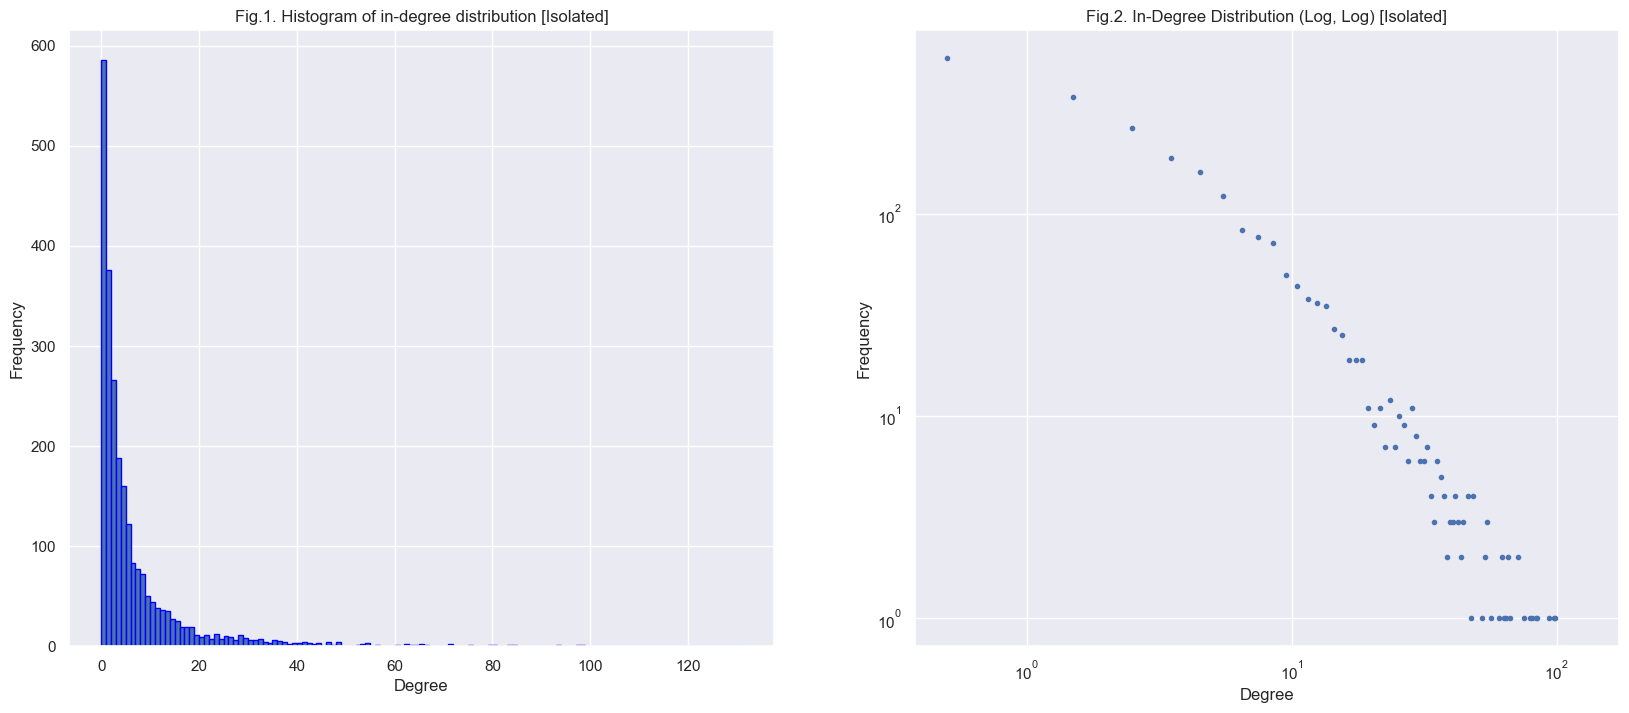

In [21]:
#Plot degree distribution 
plot_degree_distribution(in_deg, "Fig.1. Histogram of in-degree distribution [Isolated]", 
                        "Fig.2. In-Degree Distribution (Log, Log) [Isolated]")

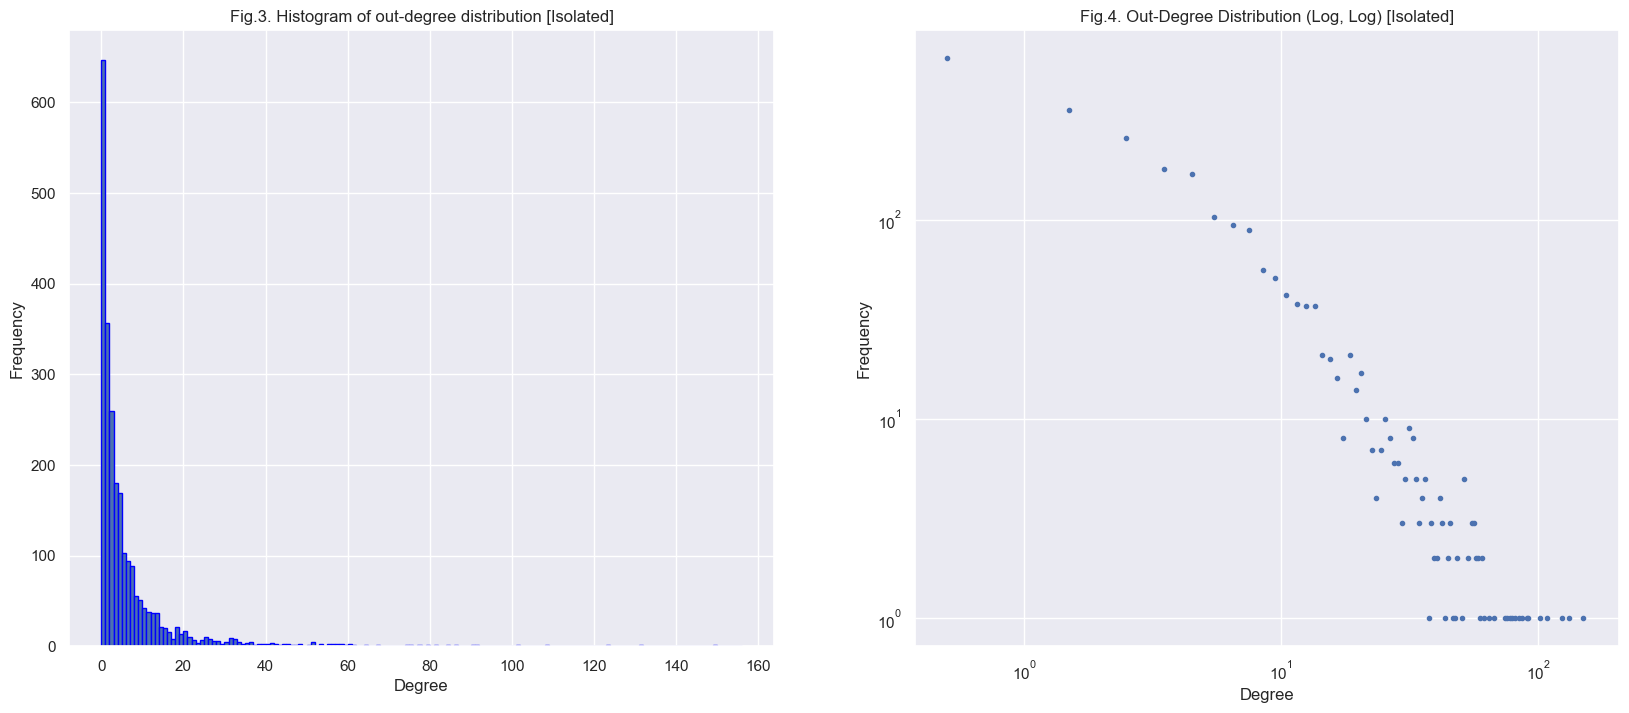

In [22]:
#Plot degree distribution 
plot_degree_distribution(out_deg, "Fig.3. Histogram of out-degree distribution [Isolated]", 
                        "Fig.4. Out-Degree Distribution (Log, Log) [Isolated]")

In [23]:
print(f'Top 3 nodes with the highest degree centrality:\n {sorted(nx.degree_centrality(G).items(), key=lambda t: t[1], reverse=True)[:3]}')

Top 3 nodes with the highest degree centrality:
 [('Led Zeppelin', 0.08326497128794094), ('Mariah Carey', 0.081214109926169), ('Celine Dion', 0.07629204265791632)]


In [24]:

#5. Look into specific album sides. What are the links that we are using? Are some of them unnecessary, such as "See also" which are worthless because they include bias of editors knowledge, while in out sense there is no connection?

## Visualization

In [38]:
def plot_with_fa(G):
    node_size = [node_degree_to_size(d) for k, d in dict(G.degree).items()]
    node_label = {k: k for k, d in dict(G.degree).items() if d > 50}

    forceatlas2 = ForceAtlas2(
        # Behavior alternatives
        outboundAttractionDistribution=True,  # Dissuade hubs
        #edgeWeightInfluence: How much influence you give to the edges weight. 0 is "no influence" and 1 is "normal"
        edgeWeightInfluence=0.1,

        # Performance
        jitterTolerance=7,  # Tolerance
        barnesHutOptimize=True,
        barnesHutTheta=1.6,

        # Tuning
        scalingRatio=1.0,
        strongGravityMode=False,
        gravity=15.0,

        # Log
        verbose=True)

    positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=1000)
    nx.draw_networkx_nodes(G, positions, alpha=1, node_color=None, node_size=node_size)
    nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.15)
    nx.draw_networkx_labels(G, positions, node_label, font_size=3, font_color='black')

    
    fig = plt.gcf()
    plt.axis('off')
    plt.show()
    animation = FuncAnimation(fig, update, interval=50, frames=range(size), blit=True)
    #ani.save('network2.gif', writer='imagemagick',  savefig_kwargs={'facecolor':'white'}, fps=1)
    writergif = animation.PillowWriter(fps=30) 
    anim.save(f, writer=writergif)

In [26]:
#plot_with_fa(G)

## Draw Network and Save it as GIF

100%|██████████| 2000/2000 [01:11<00:00, 27.86it/s]


BarnesHut Approximation  took  32.44  seconds
Repulsion forces  took  34.60  seconds
Gravitational forces  took  0.37  seconds
Attraction forces  took  0.24  seconds
AdjustSpeedAndApplyForces step  took  1.63  seconds


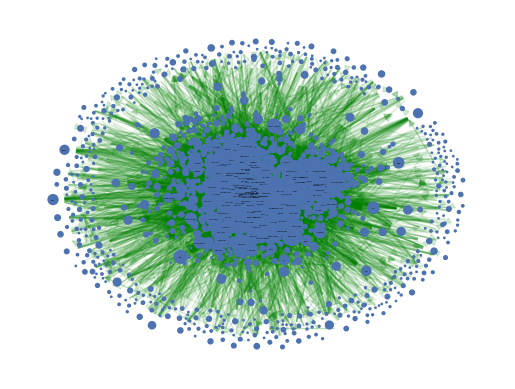

<ipython-input-32-b223371df528>:47: DeprecationWarning: This function is deprecated. Please call randint(0, 5 + 1) instead
  frame = np.random.random_integers(0, 5, (size, size))
MovieWriter imagemagick unavailable; using Pillow instead.


In [32]:
# it's important that the frames go as input and is not generated on the fly
node_size = [node_degree_to_size(d) for k, d in dict(G.degree).items()]
node_label = {k: k for k, d in dict(G.degree).items() if d > 40}
plt.ion()
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    #edgeWeightInfluence: How much influence you give to the edges weight. 0 is "no influence" and 1 is "normal"
    edgeWeightInfluence=0,

    # Performance
    jitterTolerance=7,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.6,

    # Tuning
    scalingRatio=1.0,
    strongGravityMode=False,
    gravity=15.0,

    # Log
    verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)
nodes = nx.draw_networkx_nodes(G, positions, alpha=1, node_color=None, node_size=node_size)
edges = nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.15)
labels = nx.draw_networkx_labels(G, positions, node_label, font_size=1, font_color='black')

plt.axis('off')
plt.show()


###CREATE GIF
def update(i):
    # for i in range(len(frame)):
    # instead of giving frame as input, if I randomly generate it, then it works
    nc = frame[i] # np.random.randint(2, size=200)
    nodes.set_array(nc)
    return nodes,



# number of nodes
size = 10
#size = G.number_of_nodes()
# random ndarray between 0 and 5, length and number of frames = number of nodes in the graph
frame = np.random.random_integers(0, 5, (size, size)) 
# output animation GIF


MovieWriter imagemagick unavailable; using Pillow instead.


In [34]:
old_G = pd.read_pickle('/Users/dariazahaleanu/Downloads/G.pickle')

100%|██████████| 1000/1000 [00:58<00:00, 17.07it/s]


BarnesHut Approximation  took  18.07  seconds
Repulsion forces  took  36.64  seconds
Gravitational forces  took  0.21  seconds
Attraction forces  took  1.02  seconds
AdjustSpeedAndApplyForces step  took  0.90  seconds


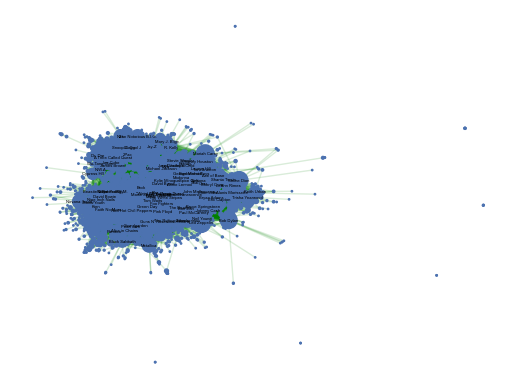

In [40]:
plot_with_fa(old_G)

100%|██████████| 1000/1000 [00:38<00:00, 25.86it/s]


BarnesHut Approximation  took  16.45  seconds
Repulsion forces  took  19.14  seconds
Gravitational forces  took  0.26  seconds
Attraction forces  took  0.67  seconds
AdjustSpeedAndApplyForces step  took  0.87  seconds


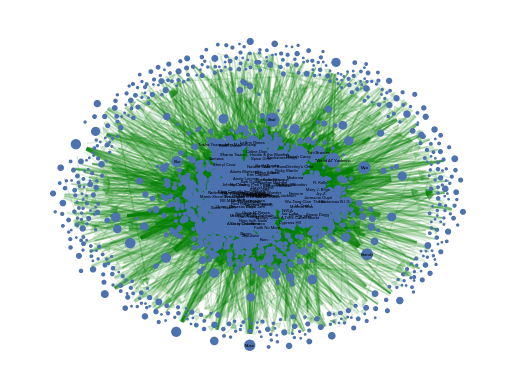

In [39]:
plot_with_fa(G)

In [56]:
def animate():
    node_size = [node_degree_to_size(d) for k, d in dict(G.degree).items()]
    node_label = {k: k for k, d in dict(G.degree).items() if d > 40}
    plt.ion()
    forceatlas2 = ForceAtlas2(
        # Behavior alternatives
        outboundAttractionDistribution=True,  # Dissuade hubs
        #edgeWeightInfluence: How much influence you give to the edges weight. 0 is "no influence" and 1 is "normal"
        edgeWeightInfluence=0,

        # Performance
        jitterTolerance=7,  # Tolerance
        barnesHutOptimize=True,
        barnesHutTheta=1.6,

        # Tuning
        scalingRatio=1.0,
        strongGravityMode=False,
        gravity=15.0,

        # Log
        verbose=True)

    positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=10)
    nodes = nx.draw_networkx_nodes(G, positions, alpha=1, node_color=None, node_size=node_size)
    plt.axis('off')
    plt.show()

#     nodes = nx.draw_networkx_nodes(G, positions, alpha=1, node_color=None, node_size=node_size)
#     edges = nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.15)
#     labels = nx.draw_networkx_labels(G, positions, node_label, font_size=1, font_color='black')

In [57]:
def update(i):
    # for i in range(len(frame)):
    # instead of giving frame as input, if I randomly generate it, then it works
    nc = frame[i] # np.random.randint(2, size=200)
    nodes.set_array(nc)
    return nodes,

In [59]:
frame = np.random.random_integers(0, 5, (size, size)) # random ndarray between 0 and 5, length and number of frames = number of nodes in the graph

<ipython-input-59-f9fa3649417b>:1: DeprecationWarning: This function is deprecated. Please call randint(0, 5 + 1) instead
  frame = np.random.random_integers(0, 5, (size, size)) # random ndarray between 0 and 5, length and number of frames = number of nodes in the graph


In [62]:
# output animation; its important I save it
fig = plt.gcf()

ani = FuncAnimation(fig, update, interval=10, size =20, blit=True)
ani.save('network.gif', writer='imagemagick',  savefig_kwargs={'facecolor':'white'}, fps=1)


MovieWriter imagemagick unavailable; using Pillow instead.


IndexError: index 10 is out of bounds for axis 0 with size 10